In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP libs
import spacy, nltk, gensim, sklearn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

features_df = pd.read_csv("metadata_features.csv.gz", sep = ",", compression='gzip')
features_df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

In [25]:
print(features_df.episode_description[5]) # Some descs are empty / "."

. 


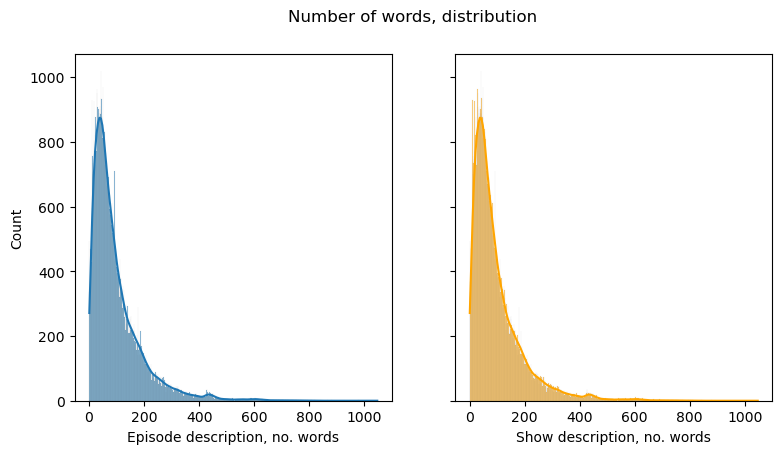

In [3]:
# Word count distributions
# looks like poisson dist?


fig, axs = plt.subplots(1,2, figsize=(9, 4.5), sharey =True)
# fig.tight_layout()

sns.histplot(x = features_df.eps_word_count, discrete = True, kde= True, ax=axs[0])
sns.histplot(x = features_df.show_word_count, discrete = True, kde= True, color="orange", ax=axs[1])
axs[0].set_xlabel("Episode description, no. words")
axs[1].set_xlabel("Show description, no. words")
fig.suptitle("Number of words, distribution")

plt.savefig(fname="words_dist.png")

## Sentiment analysis

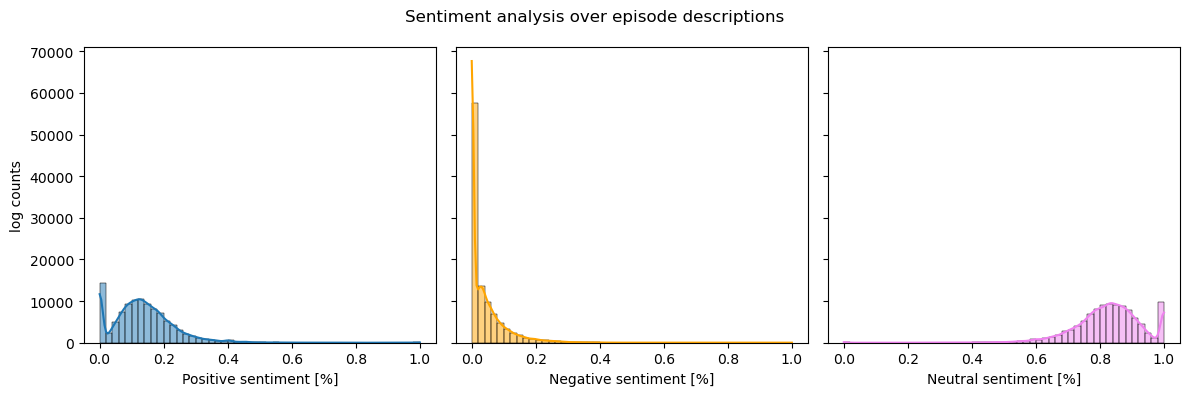

In [28]:
fig, axs = plt.subplots(1,3, figsize = (12,4), sharey = True)

sns.histplot(features_df.positive_score_eps, bins=50, kde=True, ax = axs[0])
sns.histplot(features_df.negative_score_eps, bins=50, kde=True, ax = axs[1], color="orange")
sns.histplot(features_df.neutral_score_eps, bins=50, kde=True, ax = axs[2], color="violet")
axs[0].set_ylabel("counts")
axs[0].set_xlabel("Positive sentiment [%]")
axs[1].set_xlabel("Negative sentiment [%]")
axs[2].set_xlabel("Neutral sentiment [%]")
fig.suptitle("Sentiment analysis over episode descriptions")
fig.tight_layout()
plt.savefig("sentiment_plot")